Project 8

# Project description  
  
Market research on establishments in Los Angeles in order to attract investors. Idea: small robot-run cafe in Los Angeles.

### Table of Contents: <a class="anchor" id="contents"></a>

#### [1. Preparing environment and uploading data](#chapter1)
   * [1.1 Importing packages](#chapter2)
   * [1.2 Loading and optimizing datasets](#chapter3)
   
#### [2. Studying the general information](#chapter4)
   * [Conclusion](#chapter21)  
   
#### [3. Data preprocessing](#chapter5)
   * [3.1 Processing name of the establishment](#chapter6)
   * [3.2 Processing information about chain/not chain establishment](#chapter7)
   * [3.3 Processing establishment type](#chapter8)
   * [3.4 Processing addresses of the establishment](#chapter9)
   * [Conclusion](#chapter10)
   
#### [4. Data analysis](#chapter11)
   * [4.1 Investigating the proportions of the various types of establishments](#chapter12)
   * [4.2 Investigating the proportions of chain and nonchain establishments](#chapter13)   
   * [4.3 Finding which type of establishment is typically a chain](#chapter14)   
   * [4.4 Finding out what characterizes chains](#chapter15)   
   * [4.5 Determining the average number of seats](#chapter16)   
   * [4.6 Plotting a graph of the top ten streets by number of restaurants](#chapter17)   
   * [4.7 Finding the number of streets that only have one restaurant](#chapter18)   
   * [4.8 Looking at the distribution of the number of seats for streets with a lot of restaurants](#chapter19)   
   * [Overall conclusion](#chapter20) 
   
#### [5. Presentation](#chapter22) 

### 1.  Preparing environment and uploading data <a class="anchor" id="chapter1"></a>

#### 1.1 Importing packages <a class="anchor" id="chapter2"></a>

In [2]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import re
import random
import usaddress
from plotly import graph_objects as go

[Back to the Table of Contents](#contents)

#### 1.2 Loading and optimizing datasets <a class="anchor" id="chapter3"></a>

In [5]:
#reading csv
rest_data_path = 'test'
#downloading parts of data sets
df = pd.read_csv(rest_data_path, nrows=500)

In [6]:
df.sample()

,id,object_name,address,chain,object_type,number
176,11962,MASHTI ICE CREAM,1525 N LA BREA AVE,False,Restaurant,16


The table contains:
- object_name — establishment name;
- chain — chain establishment (TRUE/FALSE);
- object_type — establishment type;
- address — address;
- number — number of seats.

In [7]:
#cecking information about the table
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
id             500 non-null int64
object_name    500 non-null object
address        500 non-null object
chain          500 non-null bool
object_type    500 non-null object
number         500 non-null int64
dtypes: bool(1), int64(2), object(3)
memory usage: 113.8 KB


Size of the 500 rows of downloaded data is 113.8 kb. Table are quite heavy.   
I will check how to optimize data:  

In [8]:
df.object_type.value_counts()

Restaurant    378
Fast Food      61
Bakery         19
Bar            15
Pizza          14
Cafe           13
Name: object_type, dtype: int64

- Column 'object_type' contains six establishment types(categories).   
Pandas has a special type for such data: category. It looks a lot like text but uses considerably less space than object data type.

In [9]:
#changing format
df['object_type'] = df['object_type'].astype('category')

In [10]:
#checking result
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
id             500 non-null int64
object_name    500 non-null object
address        500 non-null object
chain          500 non-null bool
object_type    500 non-null category
number         500 non-null int64
dtypes: bool(1), category(1), int64(2), object(2)
memory usage: 82.4 KB


Now our DataFrame is 82.4 kilobytes instead of 113.8.  

I will download full data sets with the optimized data types in columns:
   - dtype - this parameter changes data type in columns.

In [11]:
#df = pd.read_csv(rest_data_path, dtype={'object_type': 'category'})
df = pd.read_csv(rest_data_path)

Data set was downloaded with optimized data types.

[Back to the Table of Contents](#contents)

### 2. Studying the general information <a class="anchor" id="chapter4"></a>

In [12]:
#checking the table
df.head()
df.tail()

,id,object_name,address,chain,object_type,number
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6
9650,21436,CAFE SPROUTS,1300 S SAN PEDRO ST STE 111,True,Restaurant,19


- values in columns 'object_name' and 'adress' need to be lower case

In [13]:
#checking information about the table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9648 non-null object
object_type    9651 non-null object
number         9651 non-null int64
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


- Column 'chain' that contain information about chain establishment (TRUE/FALSE) has object data type instead of boolean index (bool). The reason of that is 3 missing values in this column.  
- There are no missing values in the other columns.

In [14]:
#checking missing values in column 'chain'
df.query('chain != (False, True)')

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


Let's check if this establishments are chain or not:

In [15]:
#creating parameter with names of establishments without information if this palce are chain or not
missing_name = df.query('chain != (False, True)')['object_name']

In [16]:
#checking if there is any establishment with the same name
df.query('object_name in @missing_name')

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


There is only one place with the same name, therefore these establishments are not chain.

In [17]:
#checking values in columns with numbers
df.describe()

,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


Number of seats range from 1 to 229.

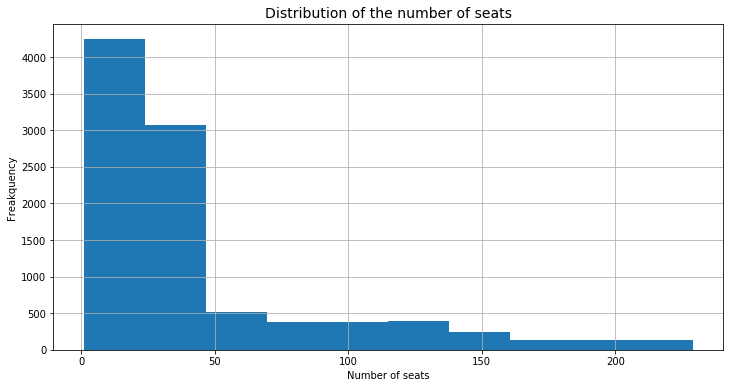

In [18]:
#building a histogram
df.number.hist(figsize=(12,6))
plt.xlabel('Number of seats')
plt.ylabel('Freakquency')
plt.title('Distribution of the number of seats', fontsize=14)
plt.show()

As we can see most of the establishments have less than 50 seats.

let's check how many food and drink venues have one or 200+ seats:

In [19]:
#calculating
print('Number of establisments with one seat:', df.query('number == 1')['object_name'].count())
print('Number of establisments with 200+ seats:', df.query('number > 200')['object_name'].count())

Number of establisments with one seat: 187
Number of establisments with 200+ seats: 170


It seems possible.  
I assume that establishments with one seat can be places with take away food.  
In case with 200+ number of seats they can be banquet halls or restaurants in the hotels.

In [20]:
#checking for duplicates
df.duplicated().sum()

0

I don't see obvious duplicates.  
Let's check values in each column:

In [21]:
#checking values in column 'object_name'
df.object_name.value_counts()

THE COFFEE BEAN & TEA LEAF    47
SUBWAY                        31
DOMINO'S PIZZA                15
WABA GRILL                    14
KENTUCKY FRIED CHICKEN        14
                              ..
MCDONALD'S #1135               1
LA MAYOR DOMIA 2               1
MAMA'S ORIGINAL PIZZA          1
LA CHINA OAXAQUENA             1
HO MI BING                     1
Name: object_name, Length: 8672, dtype: int64

As we can see there are some names with numbers and symbols.  
Let's check it:

In [22]:
#selecting values with numbers in column 'object_name'
df.loc[df["object_name"].str.contains("\d+")] 

,id,object_name,address,chain,object_type,number
19,11805,DELTA SKY CLUB T3,300 WORLD WAY,False,Restaurant,103
30,11816,CAFE 153,1125 3/4 WALL ST,False,Restaurant,5
40,11826,SUBWAY -52105,255 S GRAND AVE STE 101,True,Fast Food,37
42,11828,PANDA EXPRESS #2596,1544 S LA CIENEGA BLVD,True,Fast Food,22
46,11832,THE COUNTER SPACE 7C,700 WORLD WAY,True,Restaurant,20
...,...,...,...,...,...,...
9593,21379,PANDA EXPRESS 2919,1810 W SLAUSON AVE,True,Fast Food,15
9616,21402,TACOS LOS 4 CARNALES,5000 WHITTIER BLVD,False,Fast Food,9
9623,21409,310 COFFEE COMPANY,11623 WASHINGTON PL,False,Cafe,12
9632,21418,PIZZA DE CAL #36,252 E MARTIN LUTHER KING JR BLVD,False,Pizza,9


In [23]:
#selecting values with symbols in column 'object_name'
df.loc[df["object_name"].str.contains("[@_!#$%^*()<>?/\|}{~:]")] 

,id,object_name,address,chain,object_type,number
42,11828,PANDA EXPRESS #2596,1544 S LA CIENEGA BLVD,True,Fast Food,22
49,11835,AFC SUSHI AT WALGREENS #1527,1501 N VINE ST,False,Restaurant,8
55,11841,RALPHS MARKET #206,5429 HOLLYWOOD BLVD,False,Restaurant,22
61,11847,KIKKA @ ARCO PLAZA,505 S FLOWER ST # B-270,True,Restaurant,21
69,11855,MRS FIELD'S COOKI #426,505 S FLOWER ST,False,Restaurant,11
...,...,...,...,...,...,...
9562,21348,7-ELEVEN STORE #18778D,7600 W SUNSET BLVD,False,Restaurant,1
9581,21367,CHINATOWN EXPRESS #1,4201 BEVERLY BLVD,True,Fast Food,24
9587,21373,VALENCIA REST. GROUP #1,727 N BROADWAY # 120,False,Restaurant,39
9632,21418,PIZZA DE CAL #36,252 E MARTIN LUTHER KING JR BLVD,False,Pizza,9


There are a lot of values with numbers (1300 rows) or symbols (1112 rows) in the column 'object_name'.  
As I can see here numbers in many cases are not a part of the name.    
For example "PANDA EXPRESS #2596" and "PANDA EXPRESS 2919" are just "PANDA EXPRESS" fast food company.  
Probably it was a typo or if data were collected automatically it was programming error.  
So, to avoid duplicates and get more accurate results it is better to remove numbers and symbols from the object name.

In [24]:
#selecting values with only numbers in column 'object_name'
df.loc[df["object_name"].str.isnumeric()] 

,id,object_name,address,chain,object_type,number
1445,13231,333,333 S BOYLSTON ST,True,Restaurant,180


I found one restaurant with only numbers in the name.

In [25]:
#selecting values
df.query("object_name == 'KFC'").head()

,id,object_name,address,chain,object_type,number
2402,14188,KFC,340 N WESTERN AVE,True,Fast Food,66
2649,14435,KFC,11864 WILMINGTON AVE,True,Fast Food,19
3781,15567,KFC,5720 S VERMONT AVE,True,Fast Food,6
4307,16093,KFC,126 S VERMONT AVE # 112,True,Fast Food,37
5826,17612,KFC,2801 W OLYMPIC BLVD,True,Fast Food,101


In [26]:
#selecting values
df.query("object_name == 'KENTUCKY FRIED CHICKEN'").head()

,id,object_name,address,chain,object_type,number
311,12097,KENTUCKY FRIED CHICKEN,320 N SOTO ST,True,Fast Food,25
727,12513,KENTUCKY FRIED CHICKEN,708 S BROADWAY,True,Fast Food,104
895,12681,KENTUCKY FRIED CHICKEN,5925 W 3RD ST,True,Fast Food,20
2943,14729,KENTUCKY FRIED CHICKEN,10501 W PICO BLVD,True,Fast Food,37
3957,15743,KENTUCKY FRIED CHICKEN,1400 GLENDALE BLVD,True,Fast Food,39


I found that the same establishment's name is written differently and python see it as totally different restaurants.

In [27]:
#checking values in column 'adress'
df.address.value_counts()

3607 TROUSDALE PKWY         11
135 N GRAND AVE             10
5151 STATE UNIVERSITY DR     9
600 WORLD WAY                9
400 WORLD WAY                9
                            ..
2010 N HIGHLAND AVE          1
3460 W 8TH ST                1
8428 MELROSE PL STE #A       1
11750 JEFFERSON BLVD         1
978 GAYLEY AVE               1
Name: address, Length: 8517, dtype: int64

We have full adress here and everything looks ok.

In [28]:
#checking values in column 'chain'
df.chain.value_counts()

False    5972
True     3676
Name: chain, dtype: int64

We have more not chain establishments.  
Let's check if there is any mistakes:

In [29]:
#creating parameter with names of chain restaurants
chain_est = df.query('chain == True')['object_name']

In [30]:
#checking if all chain restaurants are indicated as chain in the table
df.query('object_name in @chain_est')['chain'].value_counts()

True     3676
False       9
Name: chain, dtype: int64

I found that some of the chain establishments indicated as not chain in the table.

In [31]:
#creating parameter with establishments with more than 1 place
chain_est_2 = df.object_name.value_counts().reset_index()
chain_est_2.columns = ['object_name', 'number']
chain_est_2 = chain_est_2.query('number > 1')
chain_est_2 = chain_est_2.object_name

In [32]:
#checking if these restaurants are indicated as chain in the table
df.query('object_name in @chain_est_2')['chain'].value_counts()

True     1441
False      62
Name: chain, dtype: int64

I found that some of the establishments have more than one place and not indicated as chain in the table.

In [33]:
#selecting chain restaurants
df.query('chain == True')['object_name'].value_counts().tail(10)

MARISCOS GUADALAJARA RESTAURANTE    1
GIGI'S BAKERY & CAFE                1
PANDA KING CHINESE FOOD             1
EL BUEN GUSTO                       1
YOSHINOYA #1210                     1
WING STOP REST #3                   1
STARBUCKS #27874                    1
SUPER KING MARKET-BAKERY            1
ORIENTAL HOUSE RESTAURANT           1
AN DONG GOOK SI                     1
Name: object_name, dtype: int64

Some of the establishments have one place and indicated as chain.  
Some of them have numbers in the name and python count it as independent restaurant, some of them may have only one place in this city.

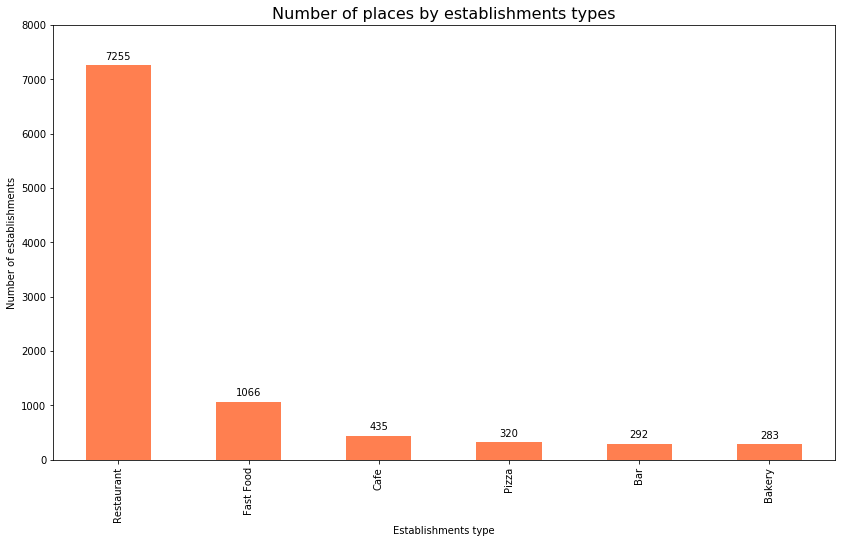

In [34]:
#checking values in column 'object_type'
#making graph
ax = df.object_type.value_counts().plot(kind='bar', color="coral", figsize=(14,8))
#putting text on the graph
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
#creating graph captions
plt.xlabel('Establishments type')
plt.ylabel('Number of establishments')
plt.title('Number of places by establishments types', fontsize=16)
plt.ylim(0, 8000)
plt.show()

Everything looks ok. Most of the establishments are restaurants.  
I will check if each venues will have correct type after data preprocessing.

#### Conclusion <a class="anchor" id="chapter21"></a>

Data set was studied.  
I found that: 
- values in columns 'object_name' and 'adress' need to be lower case;
- missing values in column 'chain' correspond to not chain establishments;
- there are some names with numbers and symbols;
- there is one restaurant with only numbers in the name;
- the same establishment's name is written differently;
- some of the chain establishments indicated as not chain in the table;
- some of the establishments have more than one place and not indicated as chain in the table.

[Back to the Table of Contents](#contents)

### 3. Data preprocessing <a class="anchor" id="chapter5"></a>

In [35]:
#changing letter case in columns
df.object_name = df.object_name.str.lower()
df.address = df.address.str.lower()
#checking result
df.sample(5)

,id,object_name,address,chain,object_type,number
889,12675,fusion burgers,5933 york blvd,False,Fast Food,11
1196,12982,casa bianca,1650 colorado blvd,False,Restaurant,111
2943,14729,kentucky fried chicken,10501 w pico blvd,True,Fast Food,37
5131,16917,electric owl,1451 n gardner st,False,Restaurant,91
8687,20473,guerrilla tacos,2000 e 7th st,False,Fast Food,35


I changed letter case in columns.

In [36]:
#filling missing values in column 'chain'
df.chain = df.chain.fillna(False)
#checking result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9651 non-null bool
object_type    9651 non-null object
number         9651 non-null int64
dtypes: bool(1), int64(2), object(3)
memory usage: 386.5+ KB


Missing values were filled.

[Back to the Table of Contents](#contents)

#### 3.1 Processing name of the establishment <a class="anchor" id="chapter6"></a>

In [37]:
#rename value with only number in the name
df['object_name'] = df['object_name'].replace("333", "ThreeThreeThree")
#checking result
df.query('id == 13231')

,id,object_name,address,chain,object_type,number
1445,13231,ThreeThreeThree,333 s boylston st,True,Restaurant,180


Restaurant 333 was renamed as "ThreeThreeThree".

In [38]:
#removing all numbers and symbols from the names
pattern = re.compile("[\\'\\-@_!#$%^*()<>?/\|}{~:(0-9)]")
#creating new column with names without numbers and symbols
df['place_name'] = [pattern.sub('', x) for x in df['object_name']]
df.tail()

,id,object_name,address,chain,object_type,number,place_name
9646,21432,hall of justice,217 w temple ave,False,Restaurant,122,hall of justice
9647,21433,fin-melrose,5750 melrose ave,False,Restaurant,93,finmelrose
9648,21434,juicy wingz,6741 hollywood blvd,True,Fast Food,15,juicy wingz
9649,21435,medidate coffee,548 s spring st ste 100,False,Cafe,6,medidate coffee
9650,21436,cafe sprouts,1300 s san pedro st ste 111,True,Restaurant,19,cafe sprouts


In [39]:
#checking result
df.loc[df["place_name"].str.contains("[\\'\\-@_!#$%^*()<>?/\|}{~:(0-9)]")] 

,id,object_name,address,chain,object_type,number,place_name


All the symbols and numbers were removed from the object name and saved in column 'place_name'.

In [40]:
#calculating number of unique establishment
print('Number of unique establishments:', df.object_name.nunique())
print('Number of unique establishments after removing:', df.place_name.nunique())

Number of unique establishments: 8672
Number of unique establishments after removing: 7948


In [41]:
#checking if there are extra spaces in the names
df.loc[df["place_name"].str.contains("\\  ")] 
df.loc[df["place_name"].str.contains("\\   ")] 

,id,object_name,address,chain,object_type,number,place_name
1055,12841,chick-fil-a at 405 @ jefferson (la) fsu,11750 jefferson blvd,True,Restaurant,161,chickfila at jefferson la fsu
1240,13026,market cafe @ 550 s hope st,550 s hope st,False,Restaurant,11,market cafe s hope st
1261,13047,the la hotel downtown - main kitchen,333 s figueroa st # 104,True,Restaurant,159,the la hotel downtown main kitchen
1934,13720,the slipper clutch - ( 1st level ),351 s broadway,False,Restaurant,47,the slipper clutch st level
4289,16075,yogurtland central / slauson,5857 s central ave #120,True,Restaurant,4,yogurtland central slauson
5257,17043,starbucks @ usc,642 w 34th st,True,Cafe,17,starbucks usc
5456,17242,bar clacson - ( 2nd level ),351 s broadway,False,Bar,17,bar clacson nd level
5530,17316,starbucks - departure,200 world way # t231,True,Cafe,16,starbucks departure
5763,17549,togo's / 31 baskin robbins,6104 w sunset blvd,True,Restaurant,41,togos baskin robbins
6327,18113,starbucks (coffee bar) level 1 - ucla,10833 le conte ave,True,Cafe,36,starbucks coffee bar level ucla


I found names with extra 2 and 3 spaces in the name.  
Python consider extra space in the name as different establishment. Therefore to avoid duplicates extra spaces will be deleted.

In [42]:
#removing extra spaces from the names
pattern_2 = re.compile("\\   ")
#replacing names with names without extra spaces
df['place_name'] = [pattern_2.sub('', x) for x in df['place_name']]

In [43]:
#checking result
df.loc[df["place_name"].str.contains("\\   ")] 

,id,object_name,address,chain,object_type,number,place_name


In [44]:
#removing extra spaces from the names
pattern_3 = re.compile("\\  ")
#replacing names with names without extra spaces
df['place_name'] = [pattern_3.sub('', x) for x in df['place_name']]

In [45]:
#checking result
df.loc[df["place_name"].str.contains("\\  ")] 

,id,object_name,address,chain,object_type,number,place_name


All the extra spaces were removed from the place name.

In [46]:
#calculating number of unique establishment
print('Number of unique establishments:', df.object_name.nunique())
print('Number of unique establishments after removing:', df.place_name.nunique())

Number of unique establishments: 8672
Number of unique establishments after removing: 7926


In [47]:
#checking if there are space in the beginning or in the end of the name
df.loc[df["place_name"].str.contains("^\\ ")]
df.loc[df["place_name"].str.contains("\\ $")]

,id,object_name,address,chain,object_type,number,place_name
30,11816,cafe 153,1125 3/4 wall st,False,Restaurant,5,cafe
40,11826,subway -52105,255 s grand ave ste 101,True,Fast Food,37,subway
42,11828,panda express #2596,1544 s la cienega blvd,True,Fast Food,22,panda express
49,11835,afc sushi at walgreens #1527,1501 n vine st,False,Restaurant,8,afc sushi at walgreens
55,11841,ralphs market #206,5429 hollywood blvd,False,Restaurant,22,ralphs market
...,...,...,...,...,...,...,...
9581,21367,chinatown express #1,4201 beverly blvd,True,Fast Food,24,chinatown express
9587,21373,valencia rest. group #1,727 n broadway # 120,False,Restaurant,39,valencia rest. group
9593,21379,panda express 2919,1810 w slauson ave,True,Fast Food,15,panda express
9632,21418,pizza de cal #36,252 e martin luther king jr blvd,False,Pizza,9,pizza de cal


I found names with space in the beginning or in the end of the value.  
Python consider name with spaces in the beginning/end and name without space as different establishment.  
Therefore to avoid duplicates extra spaces will be deleted.

In [48]:
#removing space from the beginning of the names
pattern_4 = re.compile("^\\ ")
#replacing
df['place_name'] = [pattern_4.sub('', x) for x in df['place_name']]
#removing space from the end of the names
pattern_5 = re.compile("\\ $")
#creating
df['place_name'] = [pattern_5.sub('', x) for x in df['place_name']]

In [49]:
#checking result
df.loc[df["place_name"].str.contains("^\\ ")]
df.loc[df["place_name"].str.contains("\\ $")]

,id,object_name,address,chain,object_type,number,place_name


Space before and after name were removed.

In [50]:
#calculating number of unique establishment
print('Number of unique establishments before preprocessing:', df.object_name.nunique())
print('Number of unique establishments after removing:', df.place_name.nunique())

Number of unique establishments before preprocessing: 8672
Number of unique establishments after removing: 7806


In [51]:
#checking top 20 of the chain restaurants 
df.place_name.value_counts().head(20)

subway                        122
starbucks coffee               88
mcdonalds                      81
jack in the box                52
the coffee bean & tea leaf     51
burger king                    38
el pollo loco                  36
dominos pizza                  33
starbucks                      32
taco bell                      30
pizza hut                      30
yoshinoya                      28
carls jr                       27
panda express                  23
ralphs market                  21
jamba juice                    19
chipotle mexican grill         19
kentucky fried chicken         16
papa johns pizza               16
little caesars                 16
Name: place_name, dtype: int64

In [52]:
#checkin name variations
df.loc[df["place_name"].str.contains("^starbuck")]['place_name'].unique()

array(['starbucks coffee', 'starbucks', 'starbucks evening',
       'starbucksusc', 'starbucksdeparture', 'starbucksarrival',
       'starbucks coffee corporation', 'starbucks store',
       'starbucks coffee bar levelucla', 'starbucksla cafe',
       'starbuck coffee', 'starbucks cafe'], dtype=object)

As we can see there are a lot of variations of the name for Starbucks restaurant in this table. And python consider that as different places.  
I assume that it was a typo or programming error (if data were collected automatically).

In [53]:
#creating parameter with variations
starbucks = df.loc[df["place_name"].str.contains("^starbuck")]['place_name'].unique()

In [54]:
#replacing all variations by one name
df.loc[df['place_name'].isin(starbucks), 'place_name'] = "starbucks"

In [55]:
#checking result
df.loc[df["place_name"].str.contains("^starbuck")]['place_name'].unique()

array(['starbucks'], dtype=object)

I replaced all the variations by one name: "Starbucks".  
I will do the same for big chain restaurants for more accurate results of analysis.

In [56]:
#replacing variations of the name by one name for each big chain establishment
#subway
subway = df.loc[df["place_name"].str.contains("^subway")]['place_name'].unique()
df.loc[df['place_name'].isin(subway), 'place_name'] = "subway"
#mcdonalds
mcdonalds = df.loc[df["place_name"].str.contains("^mcdonald")]['place_name'].unique()
df.loc[df['place_name'].isin(mcdonalds), 'place_name'] = "mcdonalds"
#jack in the box
jack_in = df.loc[df["place_name"].str.contains("^jack in")]['place_name'].unique()
df.loc[df['place_name'].isin(jack_in), 'place_name'] = "jack in the box"
#dominos pizza
dominos = df.loc[df["place_name"].str.contains("^dominos")]['place_name'].unique()
df.loc[df['place_name'].isin(dominos), 'place_name'] = "dominos pizza"
#yoshinoya
yoshinoya = df.loc[df["place_name"].str.contains("^yoshinoya")]['place_name'].unique()
df.loc[df['place_name'].isin(yoshinoya), 'place_name'] = "yoshinoya"
#carls jr
carls_jr = df.loc[df["place_name"].str.contains("^carls jr")]['place_name'].unique()
df.loc[df['place_name'].isin(carls_jr), 'place_name'] = "carls jr"
#panda express
panda_express = df.loc[df["place_name"].str.contains("^panda expres")]['place_name'].unique()
df.loc[df['place_name'].isin(panda_express), 'place_name'] = "panda express"
#chipotle mexican grill
chipotle = df.loc[df["place_name"].str.contains("^chipotle")]['place_name'].unique()
df.loc[df['place_name'].isin(chipotle), 'place_name'] = "chipotle mexican grill"
#jamba juice
jamba = df.loc[df["place_name"].str.contains("^jamba")]['place_name'].unique()
df.loc[df['place_name'].isin(jamba), 'place_name'] = "jamba juice"
#kentucky fried chicken
kentucky = df.loc[df["place_name"].str.contains("^kentuc")]['place_name'].unique()
df.loc[df['place_name'].isin(kentucky), 'place_name'] = "KFC"
kfc = df.loc[df["place_name"].str.contains("^kfc")]['place_name'].unique()
df.loc[df['place_name'].isin(kfc), 'place_name'] = "KFC"
#papa johns pizza
papa_johns = df.loc[df["place_name"].str.contains("^papa john")]['place_name'].unique()
df.loc[df['place_name'].isin(papa_johns), 'place_name'] = "papa johns pizza"
#little caesars
little_caesars = df.loc[df["place_name"].str.contains("^little caesar")]['place_name'].unique()
df.loc[df['place_name'].isin(little_caesars), 'place_name'] = "little caesars"

In [57]:
#checking result
df.place_name.value_counts().head(20)

subway                        152
starbucks                     132
mcdonalds                      85
jack in the box                53
the coffee bean & tea leaf     51
burger king                    38
el pollo loco                  36
dominos pizza                  34
KFC                            34
taco bell                      30
pizza hut                      30
yoshinoya                      29
carls jr                       29
little caesars                 25
panda express                  24
chipotle mexican grill         22
ralphs market                  21
jamba juice                    20
papa johns pizza               18
waba grill                     14
Name: place_name, dtype: int64

Now top 20 chain restaurants look better.  
I will do the same for 10 restaurants with only one place, cause one of the task is connected with establishments with one place and if there are not correct data will be not correct result.

In [58]:
df.place_name.value_counts().tail(20)

room at the bottom                   1
crenshaw fatburger                   1
the watermark at westwood village    1
national baking co                   1
yuchun                               1
dennys inc                           1
angel food donut                     1
meze                                 1
berkshire tavern                     1
el rinconcito de mago                1
ondal jip restaurant                 1
pacific bakery and restaurant        1
e.t. s cafe                          1
oyster gourmet                       1
pats                                 1
piece o pizza and pasta              1
bludsos bbq                          1
perfect pita                         1
sam sik e                            1
fat tomatowhipped la                 1
Name: place_name, dtype: int64

In [59]:
df.loc[df["place_name"].str.contains("^el palmar")]['place_name'].unique()

array(['el palmar salvadoreno', 'el palmar salvadorian restaurant , inc',
       'el palmar salvadorean restaurant inc.'], dtype=object)

In [60]:
#el palmar salvadoreno
el_palmar = df.loc[df["place_name"].str.contains("^el palmar")]['place_name'].unique()
df.loc[df['place_name'].isin(el_palmar), 'place_name'] = "el palmar salvadoreno"
#baja fresh
baja_fresh = df.loc[df["place_name"].str.contains("^baja fresh")]['place_name'].unique()
df.loc[df['place_name'].isin(baja_fresh), 'place_name'] = "baja fresh"
#toms burger
toms_burger = df.loc[df["place_name"].str.contains("^toms burger")]['place_name'].unique()
df.loc[df['place_name'].isin(toms_burger), 'place_name'] = "toms burgers"

I found that restaurants with one place have mistakes in data also.  
I can do conclusion that data is corrupted and some of the results will not be accurate.

In [61]:
#calculating number of unique establishment
print('Number of unique establishments before preprocessing:', df.object_name.nunique())
print('Number of unique establishments after removing:', df.place_name.nunique())

Number of unique establishments before preprocessing: 8672
Number of unique establishments after removing: 7758


[Back to the Table of Contents](#contents)

#### 3.2 Processing information about chain/not chain establishment <a class="anchor" id="chapter7"></a>

On the previous step I found that some of the chain restaurants or restaurants with more than one place indicate as not chain in the 'chain' column.  
After preprocessing part of the places names we have even more mistakes here:

In [62]:
#creating parameter with names of chain restaurants
chain_est_3 = df.query('chain == True')['place_name']
#checking if all chain restaurants are indicated as chain in the table
df.query('place_name in @chain_est_3')['chain'].value_counts()

True     3676
False      71
Name: chain, dtype: int64

We have 71 not correct values in column 'chain' where chain restaurants indicate as not chain.  
Let's replace it with correct value:

In [63]:
#replacing by correct value
df.loc[df['place_name'].isin(chain_est_3), 'chain'] = True
#checking result
df.query('place_name in @chain_est_3')['chain'].value_counts()

True    3747
Name: chain, dtype: int64

Values were replaced.

In [64]:
#creating parameter with establishments with more than 1 place
chain_est_4 = df.place_name.value_counts().reset_index()
chain_est_4.columns = ['place_name', 'number']
chain_est_4 = chain_est_4.query('number > 1')
chain_est_4 = chain_est_4.place_name
#checking if these restaurants are indicated as chain in the table
df.query('place_name in @chain_est_4')['chain'].value_counts()

True     2237
False     260
Name: chain, dtype: int64

We have 260 not correct values in column 'chain' where restaurants with more than one place indicate as not chain.  
Let's replace it with correct value:

In [65]:
#replacing by correct value
df.loc[df['place_name'].isin(chain_est_4), 'chain'] = True
#checking result
df.query('place_name in @chain_est_4')['chain'].value_counts()

True    2497
Name: chain, dtype: int64

Values were replaced.

[Back to the Table of Contents](#contents)

#### 3.3 Processing establishment type <a class="anchor" id="chapter8"></a>

After data preprocessing I need to check if each venues will have correct establishment type.  
I will take top 15 big chains:

In [66]:
#selecting top 15 big chain
df.place_name.value_counts().head(15)

subway                        152
starbucks                     132
mcdonalds                      85
jack in the box                53
the coffee bean & tea leaf     51
burger king                    38
el pollo loco                  36
dominos pizza                  34
KFC                            34
pizza hut                      30
taco bell                      30
carls jr                       29
yoshinoya                      29
little caesars                 25
panda express                  24
Name: place_name, dtype: int64

In [67]:
#checking object type for each place
top15 = df.place_name.value_counts().head(15).reset_index()
top15.columns = ['name', 'number']
top15 = top15.name
for value in top15:
    print(value)
    print(df[df['place_name'] == value]['object_type'].value_counts(), '\n')

subway
Fast Food    152
Name: object_type, dtype: int64 

starbucks
Cafe    132
Name: object_type, dtype: int64 

mcdonalds
Fast Food     62
Restaurant    23
Name: object_type, dtype: int64 

jack in the box
Restaurant    53
Name: object_type, dtype: int64 

the coffee bean & tea leaf
Cafe    51
Name: object_type, dtype: int64 

burger king
Fast Food    38
Name: object_type, dtype: int64 

el pollo loco
Restaurant    36
Name: object_type, dtype: int64 

dominos pizza
Pizza         33
Restaurant     1
Name: object_type, dtype: int64 

KFC
Fast Food     32
Restaurant     2
Name: object_type, dtype: int64 

pizza hut
Pizza    30
Name: object_type, dtype: int64 

taco bell
Fast Food    30
Name: object_type, dtype: int64 

carls jr
Restaurant    29
Name: object_type, dtype: int64 

yoshinoya
Restaurant    29
Name: object_type, dtype: int64 

little caesars
Restaurant    21
Pizza          4
Name: object_type, dtype: int64 

panda express
Fast Food    24
Name: object_type, dtype: int64 



I found that some of the restaurants have two different object type.  
I will replace it by correct value:

In [68]:
#replacing by correct value
df.loc[df['place_name'] == "mcdonalds", 'object_type'] = "Fast Food"
df.loc[df['place_name'] == "dominos pizza", 'object_type'] = "Pizza"
df.loc[df['place_name'] == "KFC", 'object_type'] = "Fast Food"
df.loc[df['place_name'] == "little caesars", 'object_type'] = "Restaurant"

In [69]:
#checking result
print('Mcdonalds:')
print(df.query('place_name == "mcdonalds"')['object_type'].value_counts())

Mcdonalds:
Fast Food    85
Name: object_type, dtype: int64


For top 15 big chain restaurants object type were corrected.

[Back to the Table of Contents](#contents)

#### 3.4 Processing addresses of the establishment  <a class="anchor" id="chapter9"></a>

*Task: Put the data on street names from the address column in a separate column.

For the future analysis we need to retrieve street name from the address.  
I will use usaddress library for that.

Let's create one small example street that we will test our library on:

In [70]:
street_example=df.iloc[0]['address']
street_example

'3708 n eagle rock blvd'

Use .parse() method and pass to it any unstructed address. The library will split it into components:

In [71]:
usaddress.parse(street_example)

[('3708', 'AddressNumber'),
 ('n', 'StreetNamePreDirectional'),
 ('eagle', 'StreetName'),
 ('rock', 'StreetName'),
 ('blvd', 'StreetNamePostType')]

So now it's a list of tuples with the component and it's name. For example, "StreetName"-"Rock".  
Let's turn it into dictionary - it will be easier to call needed component.

In [72]:
raw_address=usaddress.parse(street_example)
raw_address

[('3708', 'AddressNumber'),
 ('n', 'StreetNamePreDirectional'),
 ('eagle', 'StreetName'),
 ('rock', 'StreetName'),
 ('blvd', 'StreetNamePostType')]

In [73]:
#create a new dictionary. Iterate over a list with components. So we just say: For each component in raw_address
#save component's name as key (i[1]) and component itself as value of the dictionary (i[0])
dict_address={}
for i in raw_address:
    dict_address.update({i[1]:i[0]})

In [74]:
dict_address

{'AddressNumber': '3708',
 'StreetNamePreDirectional': 'n',
 'StreetName': 'rock',
 'StreetNamePostType': 'blvd'}

Now we have a dictionary with our component of the street and we can deconstruct the street in any way we want.  
For example, we want only street name and number.

In [75]:
dict_address['StreetName']+','+dict_address['AddressNumber']

'rock,3708'

Let's wrap a function around it to apply to all our rows:

In [76]:
def cleaning_1(raw):
    raw_address=usaddress.parse(raw)
    dict_address={}
    for i in raw_address:
        dict_address.update({i[1]:i[0]})
    clean_adress=dict_address['AddressNumber']+","+str(dict_address['StreetName'])
    return clean_adress

Let's apply it to random rows and see how it works:

In [77]:
df.address.sample(5).apply(cleaning_1)

2979    1903,hyperion
2992       1827,103rd
852         380,world
4709    9824,national
689       6360,sunset
Name: address, dtype: object

It works. What if we try to apply it to all dataset?

In [78]:
df['clean_street1']=df.address.apply(cleaning_1)

KeyError: 'AddressNumber'

We got a problem. What does it mean? It means that in some of the dictionaries there is no AddressNumber (in some cases it will be an error with StreetName) Why? the library is not perfect, it tries it's best, so let's account for mistakes.  
We will include a loop in our function that will check the addresses "without street or number":

In [79]:
def cleaning_check(raw):
    raw_address=usaddress.parse(raw)
    dict_address={}
    for i in raw_address:
        dict_address.update({i[1]:i[0]})
    #this line below checks for normal case with street and number    
    if 'StreetName' in dict_address.keys() and 'AddressNumber' in dict_address.keys():
        clean_adress=dict_address['AddressNumber']+","+str(dict_address['StreetName'])
        return clean_adress
    else:
        return 'no street or number'

In [80]:
df['clean_street_check']=df.address.apply(cleaning_check)

Let's check what streets caused problems:

In [81]:
df[df['clean_street_check']=='no street or number']

,id,object_name,address,chain,object_type,number,place_name,clean_street_check
1888,13674,magdaleno debbie,olvera st e17,False,Restaurant,15,magdaleno debbie,no street or number
3719,15505,las anitas,olvera st 26,False,Restaurant,38,las anitas,no street or number
7003,18789,d.k. donuts,1033 1/2 los angeles st,False,Fast Food,8,d.k. donuts,no street or number
7281,19067,cielito lindo,olvera st 23,False,Restaurant,2,cielito lindo,no street or number
7319,19105,juanita's cafe,olvera st 20,False,Restaurant,12,juanitas cafe,no street or number
7321,19107,kitty's snow cones,olvera st 2,False,Restaurant,11,kittys snow cones,no street or number
7327,19113,la noche buena,olvera st e8,False,Restaurant,1,la noche buena,no street or number
7438,19224,la golondrina,olvera st w17,False,Restaurant,204,la golondrina,no street or number
7741,19527,rodolfo's restaurant,olvera st 5,True,Restaurant,4,rodolfos restaurant,no street or number


It's two streets: olvera and 1033 1/2 los angeles st  
Let's see how library handles them:

In [82]:
usaddress.parse(df.iloc[1888]['address'])

[('olvera', 'PlaceName'), ('st', 'StateName'), ('e17', 'ZipCode')]

See, here the library treats Olvera as PlaceName, not street.  
That's ok, it happens, we just need to account for these streets in our function:

In [83]:
def cleaning_final(raw):
    if raw.startswith('olvera'):
        clean_adress='olvera'
    elif raw.startswith('1033 1/2 los angeles st'):
        clean_adress='1/2 los angeles'
    else:
        raw_address=usaddress.parse(raw)
        dict_address={}
        for i in raw_address:
            dict_address.update({i[1]:i[0]})
        clean_adress=dict_address['StreetName']
    return clean_adress

In [84]:
df['clean_street']=df.address.apply(cleaning_final)
df.sample(10)

,id,object_name,address,chain,object_type,number,place_name,clean_street_check,clean_street
4552,16338,vinoteque on melrose,7469 melrose ave,False,Restaurant,92,vinoteque on melrose,"7469,melrose",melrose
3755,15541,green house,6333 w 3rd st,True,Restaurant,5,green house,"6333,3rd",3rd
2359,14145,shibumi,815 s hill st,False,Restaurant,13,shibumi,"815,hill",hill
5032,16818,rodeo room,1306 s vermont ave,False,Restaurant,43,rodeo room,"1306,vermont",vermont
7640,19426,lamonica's n.y. pizza,1066 gayley ave,False,Pizza,43,lamonicas n.y. pizza,"1066,gayley",gayley
9477,21263,chinnchi kurin,350 e 1st st,False,Restaurant,101,chinnchi kurin,"350,1st",1st
7546,19332,el valle oaxaqueno restauran,2318 w jefferson blvd,False,Restaurant,19,el valle oaxaqueno restauran,"2318,jefferson",jefferson
3465,15251,happy tom's burger,1807 w sunset blvd,False,Fast Food,37,happy toms burger,"1807,sunset",sunset
3738,15524,pink's,709 n la brea ave,True,Restaurant,138,pinks,"709,brea",brea
5452,17238,sam's hofbrau,1751 e olympic blvd,False,Restaurant,73,sams hofbrau,"1751,olympic",olympic


In [85]:
#deleting helper column
df = df.drop(columns=['clean_street_check'])
#checking result
df.sample()

,id,object_name,address,chain,object_type,number,place_name,clean_street
1960,13746,"kavkaz, cafe restaurant",5341 santa monica blvd,True,Restaurant,8,"kavkaz, cafe restaurant",monica


In [86]:
#checking result
df['clean_street'].value_counts().head(10)

sunset       405
wilshire     398
pico         371
western      369
figueroa     334
olympic      309
vermont      288
monica       264
3rd          263
hollywood    254
Name: clean_street, dtype: int64

Column 'clean_street_final' with clean addresses was created.

[Back to the Table of Contents](#contents)

#### Conclusion <a class="anchor" id="chapter10"></a>

Data was preprocessed.   
- values in columns 'object_name' and 'adress' were changed to lower case;
- missing values in column 'chain' were filled;
- establishments names were corrected and saved in column 'place_name';
- values in column chain were corrected; 
- names of the street were retrieved from addresses and saved in the new column 'clean_street'.

[Back to the Table of Contents](#contents)

### 4. Data analysis <a class="anchor" id="chapter11"></a>

#### 4.1 Investigate the proportions of the various types of establishments. Plot a graph.  <a class="anchor" id="chapter12"></a>

In [87]:
#general information:
print('Number of establishment:', len(df))
print('Number of  unique establishment:', len(df.place_name.unique()))

Number of establishment: 9651
Number of  unique establishment: 7758


In [88]:
#creating parameter
data_types = df.object_type.value_counts()
data_types

Restaurant    7233
Fast Food     1091
Cafe           435
Pizza          317
Bar            292
Bakery         283
Name: object_type, dtype: int64

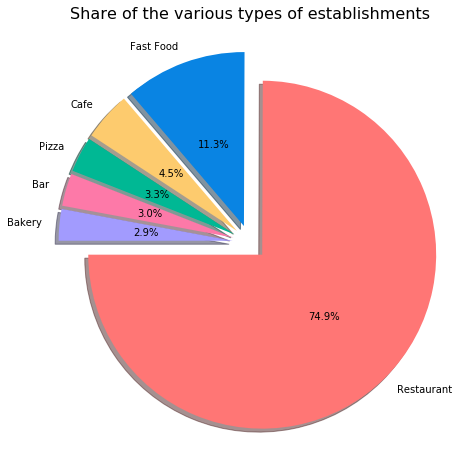

In [89]:
#building graph (pie chart)
pie, ax = plt.subplots(figsize=[14,8])
labels = data_types.keys()
colors = ['#ff7675', '#0984e3', '#fdcb6e', '#00b894', '#fd79a8', '#a29bfe']
plt.pie(x=data_types, autopct="%.1f%%",explode=[0.1]*6, labels=labels, pctdistance=0.5, 
        shadow=True, colors=colors, startangle=180)
plt.title('Share of the various types of establishments', fontsize=16)
plt.rcParams['font.size'] = 12
plt.savefig('task1.png')
plt.show()

Restaurants are most popular - 74.9%.  
Fast food is also popular -11.3%.  
Share of the other establishment types are less 5%.

[Back to the Table of Contents](#contents)

#### 4.2 Investigate the proportions of chain and nonchain establishments. Plot a graph. <a class="anchor" id="chapter13"></a>

In [90]:
#creating parameter
data_chain = df.chain.value_counts()
data_chain

False    5644
True     4007
Name: chain, dtype: int64

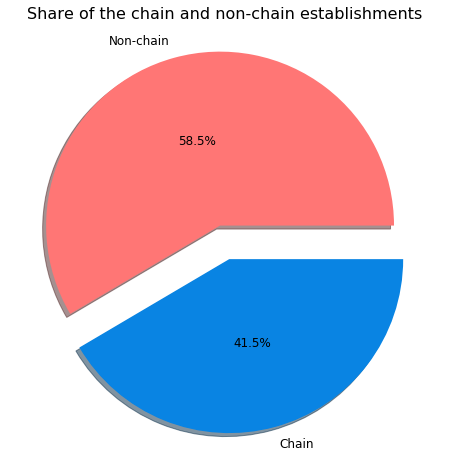

In [91]:
#building graph (pie chart)
pie, ax = plt.subplots(figsize=[14,8])
labels = ['Non-chain', 'Chain']
colors = ['#ff7675', '#0984e3']
plt.pie(x=data_chain, autopct="%.1f%%",explode=[0.1]*2, labels=labels, pctdistance=0.5, 
        shadow=True, colors=colors)
plt.title('Share of the chain and non-chain establishments', fontsize=16)
plt.savefig('task2.png')
plt.show()

Chains keep 41.5% of the market, while independent establishments have more - 58.5%.

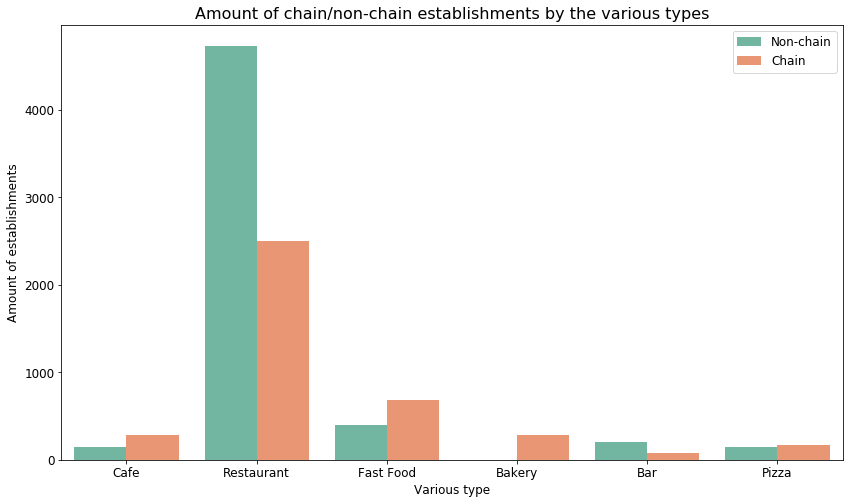

In [92]:
#making a graph
plt.figure(figsize=(14,8)) 
sns.set_palette("Set2")
sns.countplot(x='object_type', hue='chain', data=df)
plt.savefig('task3_1.png')
plt.xlabel('Various type')
plt.ylabel('Amount of establishments')
plt.legend(['Non-chain', 'Chain'])
plt.title('Amount of chain/non-chain establishments by the various types', fontsize=16)
plt.show()

In general in LA:  
We have more non-chain restaurants than chain.  
Fast Food have more chain places.  
Bakeries are only chains in this city.  
More chain cafe, but less bars, and pizza type have almost the same amount of the chain/non-chain places.

[Back to the Table of Contents](#contents)

#### 4.3 Which type of establishment is typically a chain? <a class="anchor" id="chapter14"></a>

In [93]:
#creating parameter
data_chain_type = df.query('chain == True')['object_type'].value_counts()
data_chain_type

Restaurant    2497
Fast Food      688
Cafe           283
Bakery         283
Pizza          173
Bar             83
Name: object_type, dtype: int64

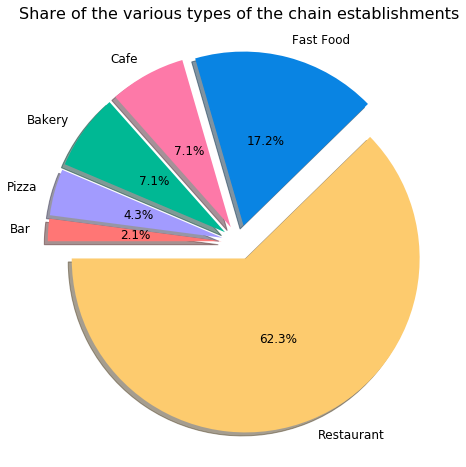

In [94]:
#building a graph (pie chart)
pie, ax = plt.subplots(figsize=[14,8])
labels = data_chain_type.keys()
colors = ['#fdcb6e', '#0984e3', '#fd79a8', '#00b894', '#a29bfe', '#ff7675']
plt.pie(x=data_chain_type, autopct="%.1f%%",explode=[0.1]*6, labels=labels, pctdistance=0.5, 
        shadow=True, colors=colors, startangle=180)
plt.title('Share of the various types of the chain establishments', fontsize=16)
plt.savefig('task3.png')
plt.show()

Restaurants are still most popular - 74.9%, but its share has been reduced comparing to the whole data.  
Fast food still on the second place - 11.3%.  
Bars have smallest share of chain - 2.1%.  

Let's compare the number of the chain' establishments with the total number of the establishments for each type:

In [95]:
#finding the number of chain establishments for each type
n_chain = df.query('chain == True').pivot_table(index='object_type', values='chain', aggfunc='count').reset_index()
n_chain.columns = ['object_type', 'n_chain']
#finding the total number of establishments for each type
n_chain_total = df.pivot_table(index='object_type', values='chain', aggfunc='count').reset_index()
n_chain_total.columns = ['object_type', 'n_chain_total']
#merging the tables
chain_share = pd.merge(n_chain, n_chain_total, how='inner', on='object_type')
#calculating share
chain_share['share'] = chain_share['n_chain']/chain_share['n_chain_total']*100
chain_share.sort_values('share', ascending=False).style.format({'share': "{:.2f}%"}).hide_index()

object_type,n_chain,n_chain_total,share
Bakery,283,283,100.00%
Cafe,283,435,65.06%
Fast Food,688,1091,63.06%
Pizza,173,317,54.57%
Restaurant,2497,7233,34.52%
Bar,83,292,28.42%


Table shows:
- all LA bakeries are chains;
- 65% of cafe are chains;
- 63% of fast foods are chains too;
- 54.6% of pizza places are chain;
- while only third part of bars and restaurants work as a part of the chain.

So even if the restaurants are still the majority of all the establishments, it makes no sense for them to be in the chain. My guess is that people prefer to have choice and different ambiance when they visit restaurant and bars.  

[Back to the Table of Contents](#contents)

#### 4.4 What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats? <a class="anchor" id="chapter15"></a>

In [96]:
#selecting data by chain and non chain establishments
data_chain = df.query('chain==True').copy()
data_non_chain = df.query('chain==False').copy()

count    4007.000000
mean       39.665835
std        43.637267
min         1.000000
25%        13.000000
50%        25.000000
75%        44.000000
max       229.000000
Name: number, dtype: float64


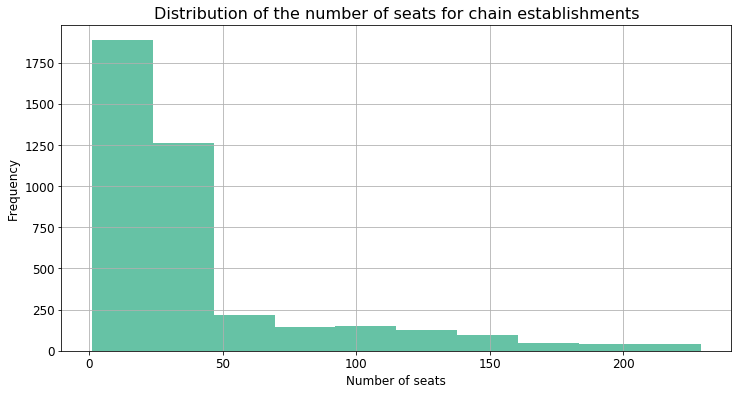

In [97]:
#making a graph
print(data_chain.number.describe())
plt.figure(figsize=(12,6)) 
data_chain.number.hist()
plt.savefig('task4.png')
plt.xlabel('Number of seats')
plt.ylabel('Frequency')
plt.title('Distribution of the number of seats for chain establishments', fontsize=16)
plt.show()

Looking at the general distribution of the chain establishment we see that most of the places have less than 50 seats.  
Number of seats range from 1 to 229 and have huge spread - 43 places.  
Median is 25  
Mean is 39.6  
Let's check the distribution through different object types:

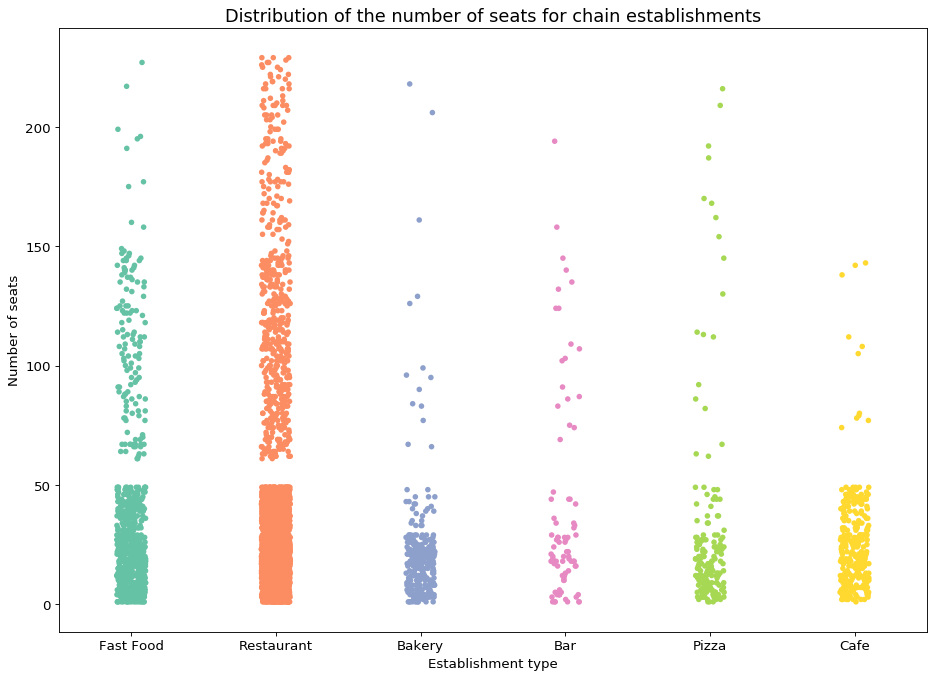

In [98]:
#making a graph
fig, ax = plt.subplots(figsize=(14,10), dpi= 80)    
sns.stripplot(x="object_type", y="number", data=data_chain) 
plt.savefig('task4_1.png')
plt.xlabel('Establishment type')
plt.ylabel('Number of seats')
plt.title('Distribution of the number of seats for chain establishments', fontsize=16)
plt.show()

Majority of the places have less than 50 seats, but there are no places with 50-60 seats.  
I suppose there can be a difference in the tax rate or licence for the establishments.

- bakeries, cafes and bars mostly have less than 50 seats;
- fast food and restaurant type have more places with a lot of seats;
- we have more restaurants with big number of seats than other place types.

Let's take a closer look on cafe (cause we want to open a small robot-run cafe):

In [99]:
#selecting cafe
cafe = df.query('object_type == "Cafe"')
cafe.number.describe()

count    435.00000
mean      25.00000
std       21.32187
min        1.00000
25%       11.00000
50%       21.00000
75%       34.00000
max      143.00000
Name: number, dtype: float64

- number of seats range from 1 to 143 places;
- 75% of the places have less than 34 seats;
- median is 21;
- mean is 25.  
Let's check the distribution for chain and non-chain cafe:

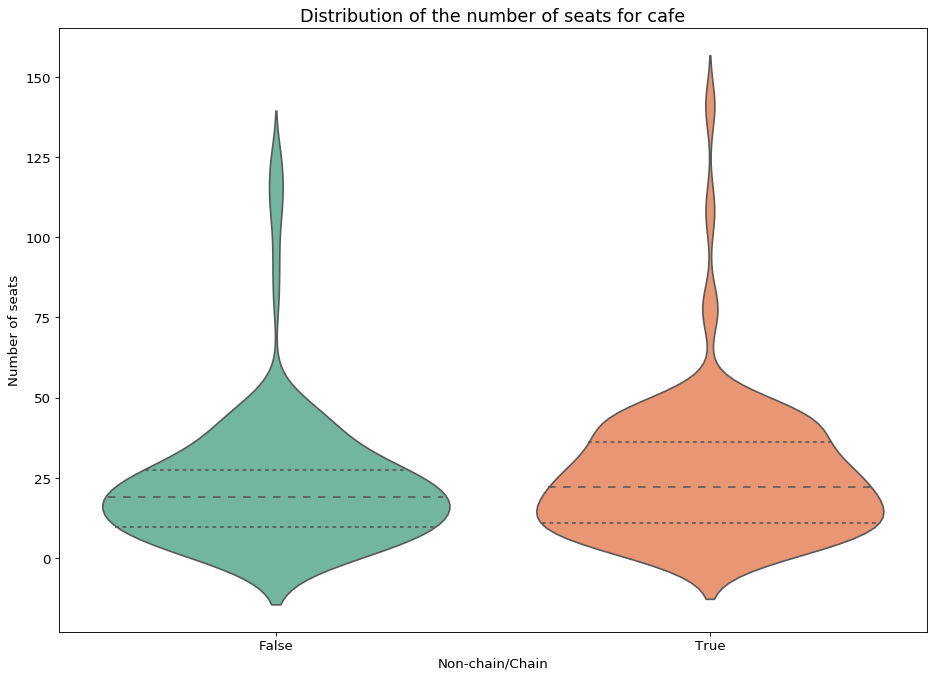

In [100]:
#let's check the distribution of seats for chain / not chain cafes
fig, ax = plt.subplots(figsize=(14,10), dpi= 80)    
sns.violinplot(x="chain", y="number", data=cafe, scale='width', inner='quartile') 
plt.savefig('task4_2.png')
plt.xlabel('Non-chain/Chain')
plt.ylabel('Number of seats')
plt.title('Distribution of the number of seats for cafe', fontsize=16)
plt.show()

Graph shows that:
- most of the non-chain cafe have around 10-30 places, chain cafe - 10-35 places;
- average number of seats for chain cafe is a bit higher;
- we have some big cafe for both types.

[Back to the Table of Contents](#contents)

#### 4.5 Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.  <a class="anchor" id="chapter16"></a>

In [101]:
#calculating average number of seats for each type of restaurant
avg_seats = df.pivot_table(index = 'object_type', values = 'number', aggfunc = 'median').sort_values(('number'), ascending=False)
avg_seats.columns = ['n_seats']
avg_seats.style.format({'n_seats': "{:.2f}"})

,n_seats
object_type,
Restaurant,29.00
Bar,28.50
Fast Food,22.00
Cafe,21.00
Pizza,19.00
Bakery,18.00


I will take a median as average number of seats, because of the data have huge spread and median will be more accurate.

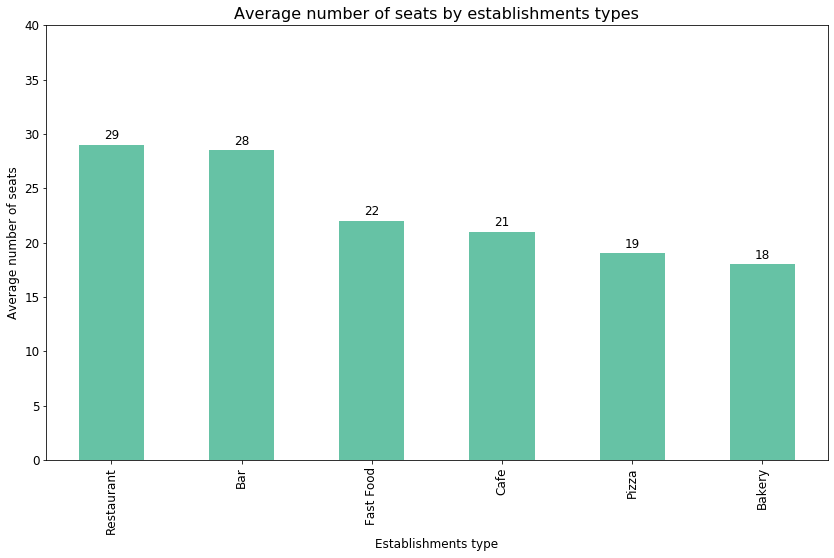

In [102]:
#plotting a graph
ax = avg_seats.plot(kind='bar', figsize=(14,8), legend=False)
#putting text on the graph
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
#creating graph captions
plt.xlabel('Establishments type')
plt.ylabel('Average number of seats')
plt.title('Average number of seats by establishments types', fontsize=16)
plt.savefig('task5.png')
plt.ylim(0, 40)
plt.show()

As we can see:
- restaurants have 29 seats in average, bars - 28, fast food - 22, pizza - 19, cafe - 21 and bakery - 18.  

This seems real. People spend more time in the restaurants and bars, also they celebrate birthdays, do banquets and weddings here, so it makes sense for them to have more seats in average.

[Back to the Table of Contents](#contents)

#### 4.6 Plot a graph of the top ten streets by number of restaurants. <a class="anchor" id="chapter17"></a>

In [103]:
#selecting top 10 streets by number of restaurants
top_streets = df.clean_street.value_counts().head(10)
top_streets.columns = ['n_restaurants']

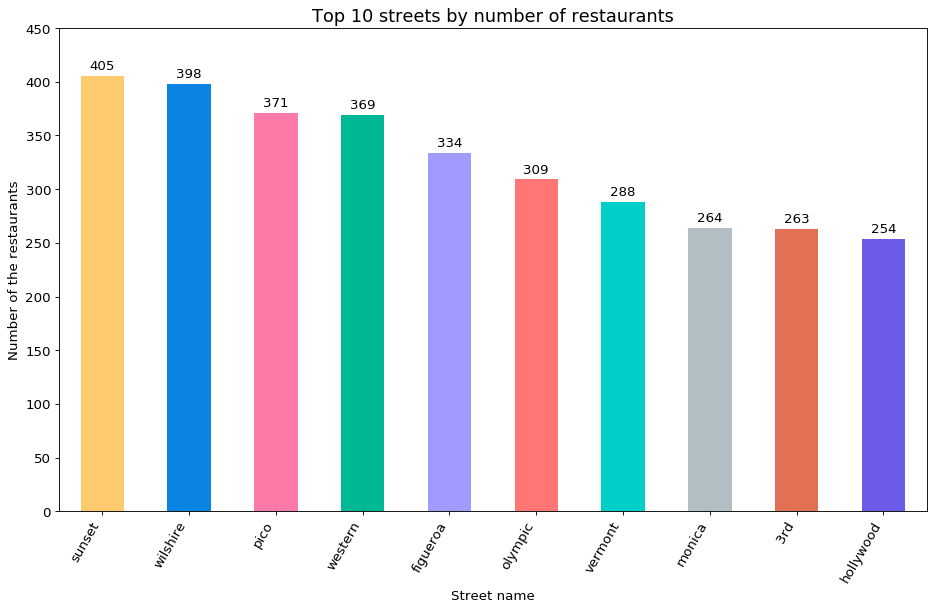

In [104]:
#plotting a graph
colors = ['#fdcb6e', '#0984e3', '#fd79a8', '#00b894', '#a29bfe', '#ff7675',
          '#00cec9', '#b2bec3', '#e17055', '#6c5ce7']
plt.figure(figsize=(14,8), dpi= 80)
ax = top_streets.plot(kind='bar', color=colors, width=.5)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.gca().set_xticklabels(top_streets.keys(), rotation=60, horizontalalignment= 'right', fontsize=12)
plt.title("Top 10 streets by number of restaurants", fontsize=16)
plt.ylabel('Number of the restaurants')
plt.xlabel('Street name')
plt.ylim(0, 450)
plt.savefig('task6.png')
plt.show()

[Back to the Table of Contents](#contents)

#### 4.7 Find the number of streets that only have one restaurant. <a class="anchor" id="chapter18"></a>

In [105]:
#creating parameter with number of restaurants per streets
rest_per_street = df.clean_street.value_counts().reset_index()
rest_per_street.columns = ['clean_street', 'number']
rest_per_street.describe()

,number
count,452.000000
mean,21.351770
std,55.439647
min,1.000000
25%,1.000000
50%,2.000000
75%,12.000000
max,405.000000


In [106]:
#calculating total number of streets
print('Total number of streets:', len(rest_per_street))

Total number of streets: 452


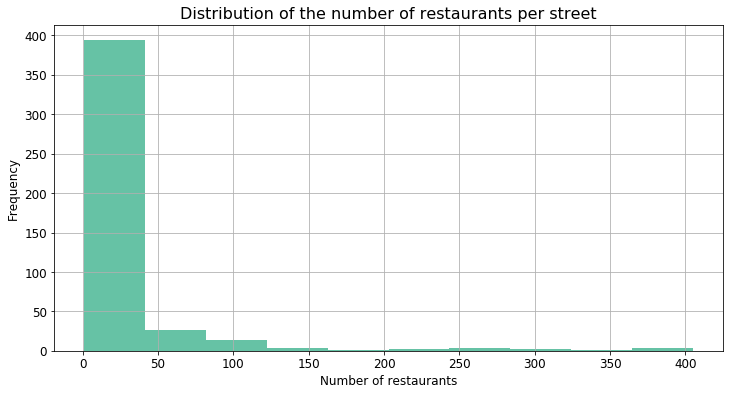

In [107]:
plt.figure(figsize=(12,6)) 
rest_per_street.number.hist()
plt.xlabel('Number of restaurants')
plt.ylabel('Frequency')
plt.title('Distribution of the number of restaurants per street', fontsize=16)
plt.savefig('task7.png')
plt.show()

Looking at the general distribution of the number of establishment per street we see that most of the street have less than 40 restaurants.  
Number of the restaurants range from 1 to 405 and have huge spread - 55 places.  
75% of the street have 12 or less restaurants.  
Median is 2.  
Mean is 21.  
We definitely have small amount of streets with a lot of restaurants:

In [108]:
print('Number of streets with more than twelve restaurants:', len(rest_per_street.query('number > 12')))
print('Number of streets with more than forty restaurants:', len(rest_per_street.query('number > 40')))

print(np.percentile(rest_per_street['number'], [90, 95, 99]))

Number of streets with more than twelve restaurants: 110
Number of streets with more than forty restaurants: 58
[ 57.   101.8  321.25]


Not more than 5% of streets have more than 102 restaurants, 1% of the streets have 321 or more establishments.  

In [109]:
#selecting streets with one restaurant
one_rest = rest_per_street.query('number == 1')
#calculating number of street with one restaurant
print('Number of streets that have only one restaurant:', len(one_rest))

Number of streets that have only one restaurant: 178


[Back to the Table of Contents](#contents)

#### 4.8 For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see? <a class="anchor" id="chapter19"></a>

In [110]:
#selecting name of the top streets
top_streets = top_streets.reset_index()
top_streets.columns = ['streets', 'n_restaurants']
top_streets = top_streets.streets

In [111]:
top_dist = df.query('clean_street in@top_streets')
print(np.percentile(top_dist['number'], [85, 90, 95]))
top_dist.number.describe()

[ 96.  123.6 153. ]


count    3255.000000
mean       45.580952
std        47.953119
min         1.000000
25%        15.000000
50%        29.000000
75%        47.000000
max       229.000000
Name: number, dtype: float64

Looking at the distribution of the number of seats for top 10 streets by number of restaurants, we see that most of the places have less than 47 seats.  
Number of seats range from 1 to 229 and have huge spread - 47 places.  
Median is 29  
Mean is 45.5  
Not a big difference from the general distribution, cause from 9651 restaurants and 452 streets in total 3255 restaurants locate on these 10 streets.   
Let's check the distribution through different streets:

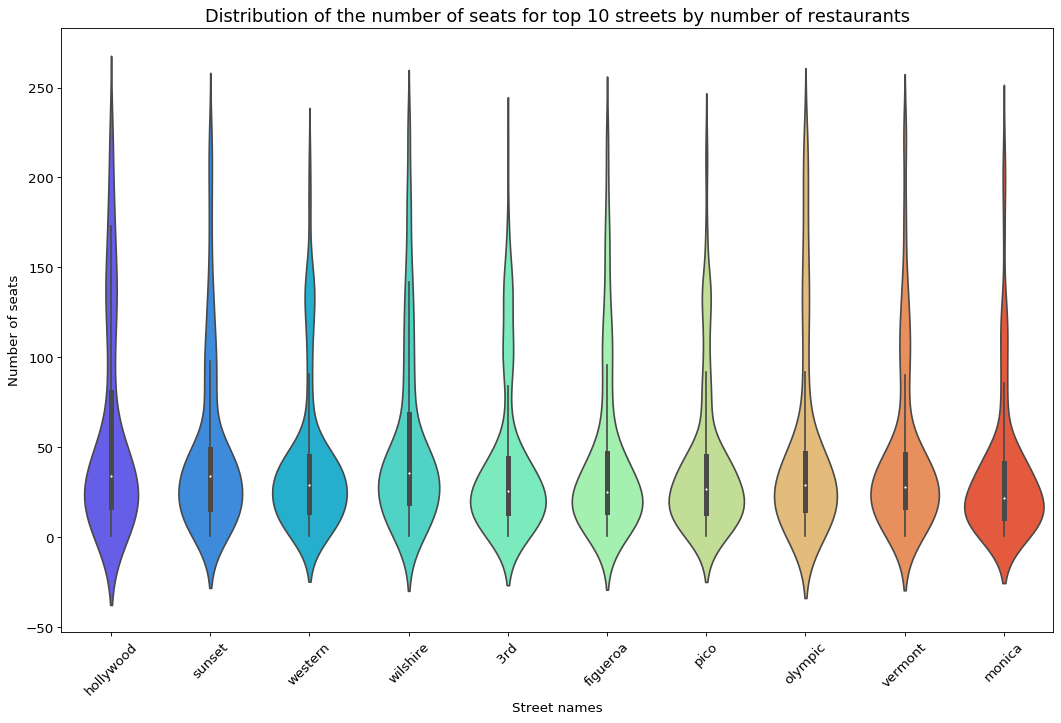

In [112]:
#let's check the distribution through different object types
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.violinplot(x="clean_street", y="number", data=top_dist, palette='rainbow')
plt.xticks(rotation=45, fontsize = 12)
plt.savefig('task8.png')
plt.title('Distribution of the number of seats for top 10 streets by number of restaurants', fontsize=16)
ax.set_xlabel('Street names')
ax.set_ylabel('Number of seats')
plt.show()

We don't see big difference between distribution of the number of seats for these streets.  
Most of the places have less than 50 seats.  
Hollywood street has a bit more big restaurants, I assume that on this street more banquete halls.  
On the 3rd, Figueroa, Pico and Monica streets a bit more small places, but again difference is not significant.

[Back to the Table of Contents](#contents)

#### Overall conclusion <a class="anchor" id="chapter20"></a>

*Task: Draw an overall conclusion and provide recommendations on restaurant type and number of seats. Comment on the possibility of developing a chain.

We analyzed data on restaurants in LA and found:  
1) Establishment type:
- LA has the most restaurants from the all types of establishments (74.9%); 
- Fast Food - 11.3%; 
- share of the other establishment types are less 5%.
---
2) Chain/non-chain restaurants:
- 58.5% percentage of the market cover non-chain establishments;
- all LA bakeries are chains;
- 65% of cafe are chains;
- 63% of fast foods are chains too;
- 54.6% of pizza places are chain;
- only third part of bars and restaurants work as a part of the chain.
---
3) Number of seats:
- majority of the places have less than 50 seats;
- fast food and restaurant type have more places with a lot of seats than other types;
- restaurants have 29 seats in average, bars - 28, fast food - 22, pizza - 19, cafe - 21 and bakery - 18;
- average number of seats for chain cafe is a bit higher than for non-chain cafe;
- distribution of the number of seats for top 10 streets by number of restaurants don't have significant difference from general distribution.
---
4) Location:
- most of the street have less than 40 restaurants;
- not more than 5% of streets have more than 102 restaurants, 1% of the streets have 321 or more establishments;
- number of streets that have only one restaurant: 178;
- number of streets with more than forty restaurants: 58.
---
**Recommendation:**  
According to our goal (open a small robot-run cafe in Los Angeles) and results of analysis I can reccomend:
- open a small cafe with 20-30 seats, cause this is most popular size of the cafe in LA;  
  
  
- the perfect location for our cafe is one of the streets with big amount of the restaurants, I assume that these streets have a good location and hight human traffic, this is exactly what we need. We will bet that our unusual idea for cafe can attract people and busy location exactly what do we need;  
  
  
- we have 65% of the chain cafe, I assume that this is popular, therefore I can recommend to consider opening a chain, it also can help to maintain success when idea become old, cause our brand will be recognizer by people. 

[Back to the Table of Contents](#contents)

### 5. Presentation <a class="anchor" id="chapter22"></a>

link:
https://drive.google.com/file/d/1Yoc2K_UzYmYN2Lbgpc3IsbPVHQ-9Usqs/view?usp=sharing

[Back to the Table of Contents](#contents)